In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.integrate import odeint
from scipy.stats import norm
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

In [7]:
def dSdt(N, alpha,S,I):
    dSdt = -alpha * S *I/N
    return dSdt
def dEdt(N, alpha,beta,S,I,E):
    dEdt = (alpha * S *I/N) - beta*E
    return dEdt
def dIdt(p,beta,gamma,lamda,E,I):
    dIdt = (beta*E) -(p*gamma*I)- ((1-p)*lamda*I)
    return dIdt
def dCdt(N, alpha,S,I):
    dCdt = alpha * S *I/N
    return dCdt
def dNCdt(N, p,gamma,I):
    dNCdt = (p*gamma*I)
    return dNCdt
def dHdt(p,q,lamda,theta,delta,I,H):
    dHdt = ((1 - p)*lamda*I) - ((1 -q)* delta*H) -( q*theta*H)
    return dHdt
def dRdt(p,q,gamma,theta,I,H):
    dRdt =  (q*theta*H)
    return dRdt
def dDdt(q,delta,H):
    dDdt = (1-q)*delta*H
    return dDdt

def rK4(N, p, q, alpha, beta, gamma, lamda, theta, delta, S , C,NC , E, I, H, R, D, dSdt,dCdt,dNCdt, dEdt, dIdt, dRdt, dHdt, dDdt):
    S1 = dSdt(N, alpha,S,I)
    C1 = dCdt(N, alpha,S,I)
    NC1 = dNCdt(N,p, gamma,I)
    E1 = dEdt(N, alpha,beta,S,I,E)
    I1 = dIdt(p,beta,gamma,lamda,E,I)
    H1 = dHdt(p,q,lamda,theta,delta,I,H)
    R1 = dRdt(p,q,gamma,theta,I,H)
    D1 = dDdt(q,delta,H)
    
    Sk1 = S + S1*0.5
    Ck1 = C + C1*0.5
    NCk1 = NC + NC1*0.5
    Ek1 = E + E1*0.5
    Ik1 = I + I1*0.5
    Hk1 = H + H1*0.5
    Rk1 = R + R1*0.5
    Dk1 = D + D1*0.5
    
    S2 = dSdt(N, alpha,Sk1,Ik1)
    C2 = dCdt(N, alpha,Sk1,Ik1)
    NC2 = dNCdt(N,p, gamma,Ik1)
    E2 = dEdt(N, alpha,beta,Sk1,Ik1,Ek1)
    I2 = dIdt(p,beta,gamma,lamda,Ek1,Ik1)
    H2 = dHdt(p,q,lamda,theta,delta,Ik1,Hk1)
    R2 = dRdt(p,q,gamma,theta,Ik1,Hk1)
    D2 = dDdt(q,delta,Hk1)
    
    Sk2 = S + S2*0.5
    Ck2 = C + C2*0.5
    NCk2 = NC + NC2*0.5
    Ek2 = E + E2*0.5
    Ik2 = I + I2*0.5
    Hk2 = H + H2*0.5
    Rk2 = R + R2*0.5
    Dk2 = D + D2*0.5
    
    S3 = dSdt(N, alpha,Sk2,Ik2)
    C3 = dCdt(N, alpha,Sk1,Ik1)
    NC3 = dNCdt(N,p, gamma,Ik2)
    E3 = dEdt(N, alpha,beta,Sk2,Ik2,Ek2)
    I3 = dIdt(p,beta,gamma,lamda,Ek2,Ik2)
    H3 = dHdt(p,q,lamda,theta,delta,Ik2,Hk2)
    R3 = dRdt(p,q,gamma,theta,Ik2,Hk2)
    D3 = dDdt(q,delta,Hk2)
    
    Sk3 = S + S3
    Ck3 = C + C3
    NCk3 = NC + NC3
    Ek3 = E + E3
    Ik3 = I + I3
    Hk3 = H + H3
    Rk3 = R + R3
    Dk3 = D + D3
       
    S4 = dSdt(N, alpha,Sk3,Ik3)
    C4 = dCdt(N, alpha,Sk3,Ik3)
    NC4 = dNCdt(N,p, gamma,Ik3)
    E4 = dEdt(N, alpha,beta,Sk3,Ik3,Ek3)
    I4 = dIdt(p,beta,gamma,lamda,Ek3,Ik3)
    H4 = dHdt(p,q,lamda,theta,delta,Ik3,Hk3)
    R4 = dRdt(p,q,gamma,theta,Ik3,Hk3)
    D4 = dDdt(q,delta,Hk3)
    
    S = S + (S1 + 2*(S2 + S3) + S4)/6
    C = C + (C1 + 2*(C2 + C3) + C4)/6
    NC = NC + (NC1 + 2*(NC2 + NC3) + NC4)/6
    E = E + (E1 + 2*(E2 + E3) + E4)/6
    I = I + (I1 + 2*(I2 + I3) + I4)/6
    H = H + (H1 + 2*(H2 + H3) + H4)/6
    R = R + (R1 + 2*(R2 + R3) + R4)/6
    D = D + (D1 + 2*(D2 + D3) + D4)/6
    return S,C,NC,E,I,H,R,D

def SEIHRD( p, q, beta, lamda,gamma,theta, delta,temps):
    alpha = np.full(temps,0.65,dtype=float)
    #alpha = np.full(temps,0.325,dtype=float)
    #controle
    alpha[:]=0.65*np.exp(np.log(1-0.5))
    S = 26000000
    NC = 0
    C = 0
    E = 0
    I = 3
    H = 0
    R = 0
    D = 0
    N = S+E+I+H+R+D
    sus,con,nconf,exp, inf, hos , rec, mor,incidence= [],[],[],[],[],[],[],[],[]
    for i in range(temps): 
        sus.append(S)
        nconf.append(NC)
        con.append(C)
        exp.append(E)
        inf.append(I)
        hos.append(H)
        rec.append(R)
        mor.append(D)
        S,C,NC,E,I,H,R,D = rK4(N, p, q, alpha[i], beta, gamma, lamda, theta, delta, S, C, NC, E, I, H, R, D, dSdt,dCdt,dNCdt, dEdt, dIdt, dRdt, dHdt, dDdt)

    return sus,con,nconf,exp, inf, hos , rec, mor

In [10]:
S,C,NC,E,I,H,R,D = SEIHRD(p=0.2, q=0.9, beta=0.2,lamda=0.5,gamma=0.08,theta=0.03, delta=0.021,temps=300)

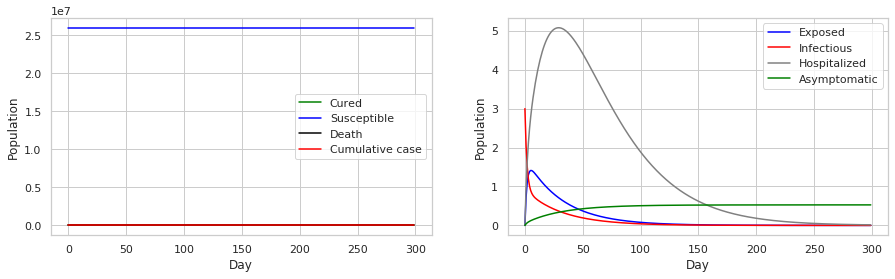

In [12]:
%matplotlib inline
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(R,color='green',label='Cured')
plt.plot(S,color='blue',label='Susceptible')
plt.plot(D,color='black',label='Death')
plt.plot(C,color='red',label='Cumulative case')
#plt.axvspan(270,300,color='pink',label='Intervention period')
#plt.axvspan(40,80,color='gray')

plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()

plt.subplot(1,2,2)
plt.plot(E,color='blue',label='Exposed')
plt.plot(I,color='red',label='Infectious')
plt.plot(H,color='grey',label='Hospitalized')
plt.plot(NC,color='green',label='Asymptomatic')

#plt.axvspan(270,300,color='pink',label='Intervention period')

plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()
plt.savefig("isolation2.jpg",dpi=500)
plt.savefig("isolation2.pdf",dpi=500)
#plt.savefig("suppesion.pdf")

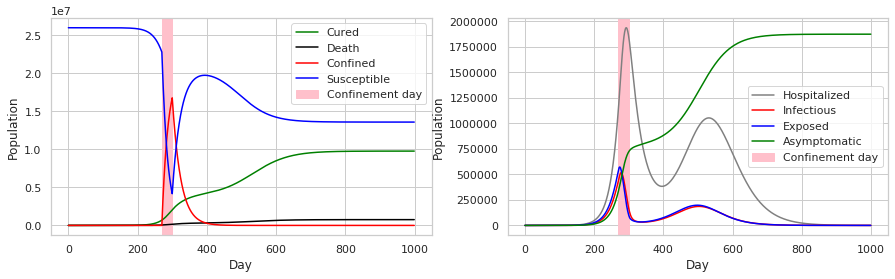

In [15]:
def simulation_EDO(N=26000000,mu=0.05,nu=0.04,p=0.4, q=0.9,alpha=0.325, beta=0.2,gamma=0.08, lamda=0.3, theta=0.03, delta=0.021,dt=1,temps=1000,i0=3): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    Conf = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    NC = np.zeros((temps))
    R = np.zeros((temps))
    G = np.zeros((temps))
    D = np.zeros((temps))
    H = np.zeros((temps))
    control = np.zeros((temps)) 
    S[0] = N - i0 
    E[0] = 0
    I[0] = i0
    NC[0] = 0
    H[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (alpha*S[i]*I[i]/N) - (control[i]*mu*S[i]) +(1-control[i])*nu*Conf[i]  
        Conf[i+1] = Conf[i] + (control[i]*mu*S[i]) - (1-control[i])*nu*Conf[i]
        
        control[270:300]=1
        E[i+1] = E[i] + (alpha*S[i]*I[i]/N - beta*E[i]) 
        I[i+1] = I[i] + ((beta*E[i]) - (p*gamma*I[i])- ((1-p)*lamda*I[i])) 
        NC[i+1] = NC[i] + (p*gamma*I[i]) 
        H[i+1] = H[i] + ((1-p)*lamda*I[i]) - ((1-q)* delta*H[i]) - (q*theta*H[i])  
        G[i+1] = G[i] + (q*theta*H[i])
        D[i+1] = D[i] + ((1-q)* delta*H[i])
        R[i+1] = G[i+1] + NC[i+1]
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,E,I,NC,H,G,D,R,Conf
t1,S1,E1,I1,NC1,H1,G1,D1,R1,Conf1 = simulation_EDO()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.axvspan(270,300,color='pink',label='Confinement day')
plt.plot(t1,G1,c='green',label='Cured')
plt.plot(t1,D1,c='black',label='Death')
#plt.ylabel('Population')
#plt.legend()
#plt.subplot(1,2,2)
plt.plot(t1,Conf1,c='red',label='Confined')
#plt.plot(t1,I1,'--',c='red',label='Infectious')
plt.plot(t1,S1,c='blue',label='Susceptible')
#plt.plot(t1,R1,'.',c='green',label='Removed')
#plt.xlabel('Day')
plt.ylabel('Population')
plt.xlabel('Day')
plt.legend()

plt.subplot(1,2,2)
#plt.figure(figsize=(17,7))
plt.axvspan(270,300,color='pink',label='Confinement day')
plt.plot(t1,H1,c='gray',label='Hospitalized')
plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()

#plt.subplot(1,3,3)

plt.plot(t1,I1,c='red',label='Infectious')
plt.plot(t1,E1,c='blue',label='Exposed')
plt.plot(t1,NC1,c='green',label='Asymptomatic')
plt.xlabel('Day')
plt.ylabel('Population')
plt.legend()
plt.savefig("confinement.jpg",dpi=500)
plt.savefig("confinement.pdf",dpi=500)
#plt.savefig("edo.pdf")

In [10]:
def  brownian ( x0 , n ,  dt ,  delta):
    x = np.zeros((n))
    x[0] = x0
    # Iterate to compute the steps of the Brownian motion.
    for k in range(1,n):
        x[k] = x[k-1] + norm.rvs(scale=delta**2*dt)
    return x
def simulation_continue(N=100,alpha=1,p=0.4, q=0.97, beta=0.15,gamma=0.1, lamda=0.2, theta=0.03, delta=0.021,temps=350,i0=5): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    NC = np.zeros((temps))
    H = np.zeros((temps)) 
    R = np.zeros((temps))
    G = np.zeros((temps))
    D = np.zeros((temps)) 
    #alpha = brownian(0.5,temps,0.1,0.01)
    
    S[0] = N - i0
    E[0] = i0
    I[0] = i0
    H[0] = 1
    NC[0] = 0
    R[0] = 0
    D[0] = 0
    t[0] = 0
    i = 0 
    
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand()
        U2 = np.random.rand()
        U3 = np.random.rand()
        U4 = np.random.rand()
        U5 = np.random.rand()
        U6 = np.random.rand()
        a = (alpha*S[i]*I[i]/N) + (beta*E[i]) + (p*gamma*I[i]) + ((1-p)*lamda*I[i]) 
        b = (p*gamma*I[i])+((1-p)*lamda*I[i]) + (q*theta*H[i] + (1-q)*delta*H[i])
        c = q*theta*H[i] + (1-q)*delta*H[i]
        prob1 = (alpha*S[i]*I[i]/N)/a
        prob2 = (p*gamma*I[i]+(1-p)*lamda*I[i])/a
        prob3 = ((1-p)*lamda*I[i])/b
        prob4 = (q*theta*H[i] + (1-q)*delta*H[i])/b
        prob5 = (q*theta*H[i])/c
        h =  1/a
        t[i+1] = t[i] + h
        if U2 <= prob1:
            S[i+1] = S[i] - 1
            E[i+1] = E[i] + 1
            I[i+1] = I[i]
            NC[i+1] = NC[i] 
            H[i+1] = H[i]
            G[i+1] = G[i] 
            D[i+1] = D[i] 
        else:
            S[i+1] = S[i] 
            E[i+1] = E[i] - 1
            I[i+1] = I[i] + 1
            NC[i+1] = NC[i] 
            H[i+1] = H[i]
            G[i+1] = G[i] 
            D[i+1] = D[i] 
        if U3 <= prob2:
            S[i+1] = S[i] 
            E[i+1] = E[i] 
            if U4 <= prob3:
                I[i+1] = I[i] - 1
                NC[i+1] = NC[i] 
                H[i+1] = H[i] + 1
            else:
                I[i+1] = I[i] - 1
                NC[i+1] = NC[i] + 1 
                H[i+1] = H[i]                   
            if U5 <= prob4:
                S[i+1] = S[i] 
                E[i+1] = E[i] 
                I[i+1] = I[i] 
                NC[i+1] = NC[i] 
                if U6 <= prob5:
                    H[i+1] = H[i] - 1
                    G[i+1] = G[i] + 1
                    D[i+1] = D[i]
                else:
                    H[i+1] = H[i] - 1
                    G[i+1] = G[i] 
                    D[i+1] = D[i] + 1
        
        R[i+1] = G[i+1] + NC[i+1]
        i += 1
    return t,S,E,I,NC,H,D,G,R

In [11]:
t

array([0.00000000e+00, 1.58730159e-01, 3.51408386e-01, 5.40087631e-01,
       7.24930515e-01, 9.06089935e-01, 1.08370983e+00, 1.25792586e+00,
       1.40830180e+00, 1.55867774e+00, 1.70682588e+00, 1.83754484e+00,
       1.98905999e+00, 2.13831372e+00, 2.28537254e+00, 2.43030008e+00,
       2.57315722e+00, 2.74010213e+00, 2.94090535e+00, 3.11213822e+00,
       3.28020545e+00, 3.44522195e+00, 3.59014949e+00, 3.73300663e+00,
       3.87385170e+00, 4.01274059e+00, 4.13758453e+00, 4.25096322e+00,
       4.37818968e+00, 4.49352994e+00, 4.59901517e+00, 4.70372721e+00,
       4.80034557e+00, 4.89640705e+00, 4.98569276e+00, 5.07458165e+00,
       5.16307722e+00, 5.24592727e+00, 5.32380889e+00, 5.40770150e+00,
       5.48650371e+00, 5.56530592e+00, 5.64392227e+00, 5.72235364e+00,
       5.80674183e+00, 5.89806603e+00, 5.99756852e+00, 6.09648048e+00,
       6.18864638e+00, 6.28038950e+00, 6.37171370e+00, 6.45740351e+00,
       6.54280060e+00, 6.62790698e+00, 6.71272463e+00, 6.79725548e+00,
      

/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars


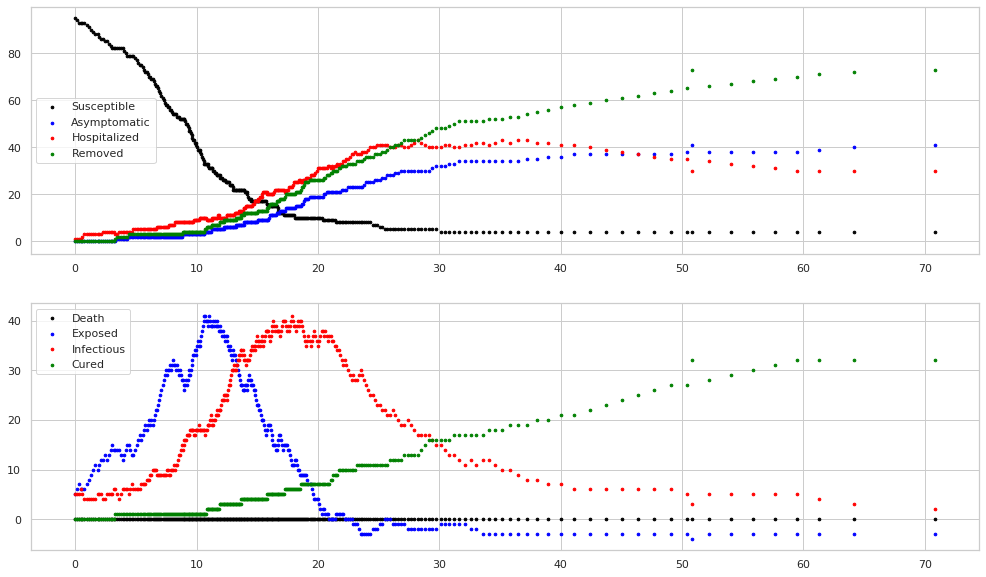

In [12]:
t,S,E,I,NC,H,D,G,R = simulation_continue()
plt.figure(figsize=(17,10))
plt.title('CTMC')
plt.subplot(2,1,1)
plt.scatter(t,S,s=7,c='black',label='Susceptible')
plt.scatter(t,NC,s=7,c='blue',label='Asymptomatic')
plt.scatter(t,H,s=7,c='red',label='Hospitalized')
plt.scatter(t,R,s=7,c='green',label='Removed')
plt.legend()

plt.subplot(2,1,2)
plt.scatter(t,D,s=7,marker='o',c='black',label='Death')
plt.scatter(t,E,s=7,c='blue',label='Exposed')
plt.scatter(t,I,s=7,c='red',label='Infectious')
plt.scatter(t,G,s=7,c='green',label='Cured')
plt.legend()
#plt.savefig("cmtc.png",dpi=600)
#plt.savefig("non_epi.pdf")
#plt.savefig("non_epi.png")

In [9]:
def NGM_SEIRHD(alpha=0.1,p=0.4, q=0.9, beta=0.15, gamma=0.09, lamda=0.20, theta=0.03, delta=0.021):
    F = np.array([[0,alpha,0],[0,0,0],[0,0,0]])
    V = np.array([[beta,0,0],[beta,(-p*gamma) -((1-p)*lamda),0],[0,(1-p)*lamda,(-(1-q)*delta) - (q*theta)]])
    NGM = F.dot(np.linalg.inv(V))
    R0 = np.linalg.eig(NGM)
    return R0

In [10]:
R0 = NGM_SEIRHD()
R0

(array([0.64102564, 0.        , 0.        ]),
 array([[1.        , 0.70710678, 0.        ],
        [0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 1.        ]]))

In [99]:
%matplotlib inline

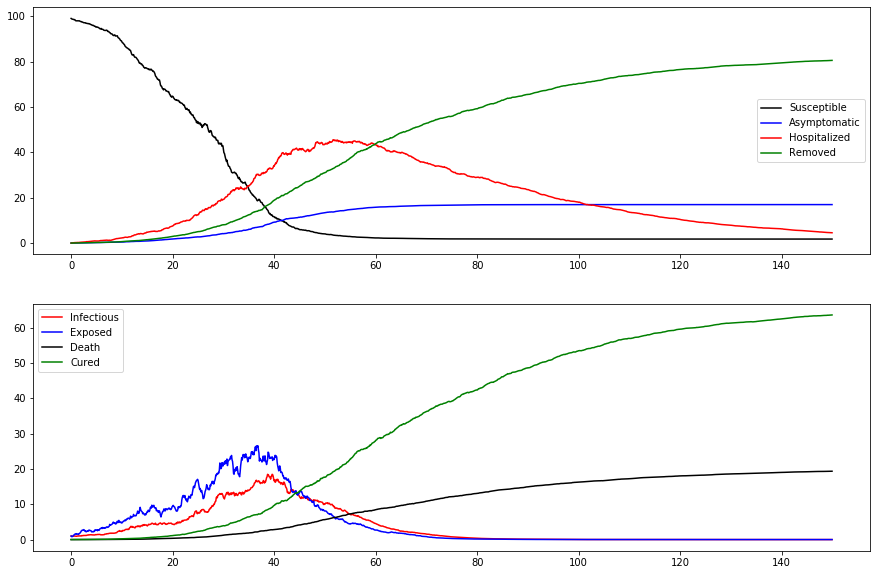

In [60]:
def simulation_EDS(N=100,p=0.4, q=0.7,beta=0.16,gamma=0.08, lamda=0.3, theta=0.03, delta=0.021,dt=0.1,temps=1500,i0=1): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    NC = np.zeros((temps))
    R = np.zeros((temps))
    G = np.zeros((temps))
    D = np.zeros((temps))
    H = np.zeros((temps))
    incidence = np.zeros((temps))
    incidence[0]=i0
    S[0] = N -i0 
    E[0] = i0
    I[0] = i0
    NC[0] = 0
    H[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        alpha = np.full(temps,0.7,dtype=float)
        #controle
        #alpha[35:80]=0
        S[i+1] = S[i] - (alpha[i]*S[i]*I[i]/N)*dt + (alpha[i]*S[i]*I[i]/N)*np.random.normal(0,dt) - (alpha[i]*S[i]*I[i]/N)*np.random.normal(0,dt)
        E[i+1] = E[i] + (alpha[i]*S[i]*I[i]/N - beta*E[i])*dt - (alpha[i]*S[i]*I[i]/N)*np.random.normal(0,dt) + (alpha[i]*S[i]*I[i]/N + beta*E[i])*np.random.normal(0,dt) - (beta*E[i])*np.random.normal(0,dt)
        I[i+1] = I[i] + ((beta*E[i]) - (p*gamma*I[i])- ((1-p)*lamda*I[i]))*dt - (beta*E[i])*np.random.normal(0,dt) + ((beta*E[i]) - (p*gamma*I[i])- ((1-p)*lamda*I[i]))*np.random.normal(0,dt)
        incidence[i] = alpha[i]*S[i]*I[i]/N
        NC[i+1] = NC[i] + (p*gamma*I[i])*dt +(p*gamma*I[i])*np.random.normal(0,dt)  
        H[i+1] = H[i] + (((1-p)*lamda*I[i]) - ((1-q)*delta*H[i]) - (q*theta*H[i]))*dt + ((1-p)*lamda*I[i]+((1-q)* delta*H[i])+(q*theta*H[i]))*np.random.normal(0,dt)
        G[i+1] = G[i] + (q*theta*H[i])*dt + (q*theta*H[i])*np.random.normal(0,dt)
        D[i+1] = D[i] + ((1-q)* delta*H[i])*dt + ((1-q)* delta*H[i])*np.random.normal(0,dt)
        R[i+1] = G[i+1] + NC[i+1]
        t[i+1] = t[i] + dt          
        i += 1
    return t,S,E,I,NC,H,G,D,R,incidence
t1,S1,E1,I1,NC1,H1,G1,D1,R1,incidence1 = simulation_EDS()
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
#plt.ylim((0,1))
plt.plot(t1,S1,c='black',label='Susceptible')
plt.plot(t1,NC1,c='blue',label='Asymptomatic')
plt.plot(t1,H1,c='red',label='Hospitalized')
plt.plot(t1,R1,c='green',label='Removed')
plt.legend()
plt.subplot(2,1,2)
#plt.ylim((0,0.7))
plt.plot(t1,I1,c='red',label='Infectious')
plt.plot(t1,E1,c='blue',label='Exposed')
plt.plot(t1,D1,c='black',label='Death')
plt.plot(t1,G1,c='green',label='Cured')
plt.legend()
#plt.savefig("eds.png",dpi=200)
#plt.savefig("sans_epi.png")

In [32]:
import numpy as np
def NGM(alpha=0.65,p=0.4,gamma=0.08, lamda=0.3):
    R0 = alpha/(p*gamma+(1-p)*lamda)
    return R0
R0 = NGM()   
R0

3.066037735849057

In [3]:
def vac(R0):
    p = 1- (1/R0)
    return p
def seuil(q):  
    R0 = -np.log(1-q)/q 
    return R0

In [4]:
R0 = np.linspace(1,3,20)
p = vac(R0)*100
q = np.linspace(0.1,0.94,20)
R = seuil(q)
q[5]

0.32105263157894737

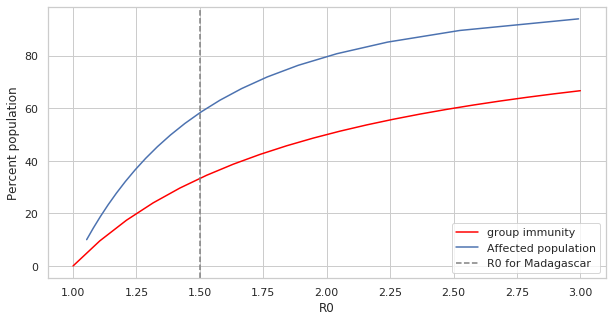

In [6]:
plt.figure(figsize=(10,5))
plt.plot(R0,p,color='red',label='group immunity')
plt.plot(R,q*100,label='Affected population')
plt.axvline(x=1.5,linestyle='--',color='gray',label='R0 for Madagascar')
plt.xlabel('R0')
plt.ylabel('Percent population')
plt.legend()
plt.savefig('imunity.jpg',dpi=500)
plt.savefig('imunity.pdf',dpi=500)

In [141]:
0.65*0.5

0.325